In [36]:
from data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Strong scaling - MPI

In [78]:
base_path = 'data/THIN/Weak Scaling/MPI'
path_512 = f'{base_path}/512x512'
path_4096 = f'{base_path}/4096x4096'

dhs_512 = []
dhs_4096 = []

In [79]:
filecodes = list(range(4,100,4))

for filecode in filecodes:
    filename_512 = f'mandelbrot_weak_mpi_512_{filecode}.log'
    filename_4096 = f'mandelbrot_weak_mpi_4096_{filecode}.log'
    dh_512 = DataHandler(f'{path_512}/{filename_512}')
    dh_4096 = DataHandler(f'{path_4096}/{filename_4096}')
    dhs_512.append(dh_512)
    dhs_4096.append(dh_4096)
    


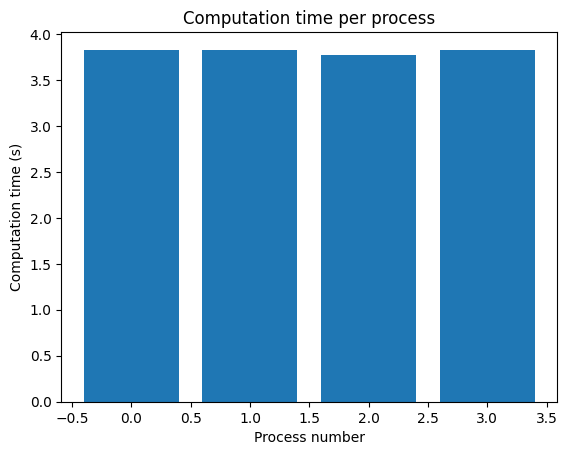

In [82]:
dhs_512[0].plot()
plt.show()

In [80]:
durations_512 = [dh.duration() for dh in dhs_512]
durations_4096 = [dh.duration() for dh in dhs_4096]
# speedups_512 = [durations_512[i]/durations_512[i-1] for i in range(1, len(durations_512))]
# speedups_4096 = [durations_4096[i]/durations_4096[i-1] for i in range(1, len(durations_4096))]

In [94]:
from sklearn.linear_model import LinearRegression

x = np.array(filecodes).reshape(-1,1)
model_512 = LinearRegression()
model_4096 = LinearRegression()


y = durations_512
model_512.fit(x, y)
y_pred_512 = model_512.predict(x)

y = durations_4096
model_4096.fit(x, y)
y_pred_4096 = model_4096.predict(x)



In [109]:
model_48 = LinearRegression()
model_48_64 = LinearRegression()
model_64 = LinearRegression()

model_48.fit(x[:12], durations_512[:12])
model_48_64.fit(x[11:16], durations_512[11:16])
model_64.fit(x[15:], durations_512[15:])

y_pred_48 = model_48.predict(x[:12])
y_pred_48_64 = model_48_64.predict(x[12:16])
y_pred_64 = model_64.predict(x[16:])

y_pred_spline = np.concatenate([y_pred_48, y_pred_48_64, y_pred_64])

In [95]:
from tabulate import tabulate
table = [
    ['512x512', model_512.coef_, model_512.intercept_],
    ['4096x4096', model_4096.coef_, model_4096.intercept_]
]
print(tabulate(table, headers=['Size', 'Slope', 'Intercept']))

Size            Slope    Intercept
---------  ----------  -----------
512x512    -0.0207238      4.83217
4096x4096  -0.26056      262.481


In [108]:
print(y_pred_512)
print(y_pred_4096)
print(y_pred_spline)

[4.7492765  4.66638118 4.58348587 4.50059055 4.41769524 4.33479992
 4.25190461 4.16900929 4.08611398 4.00321866 3.92032335 3.83742803
 3.75453272 3.6716374  3.58874209 3.50584677 3.42295146 3.34005614
 3.25716083 3.17426551 3.0913702  3.00847488 2.92557957 2.84268425]
[261.43834089 260.39610037 259.35385984 258.31161931 257.26937879
 256.22713826 255.18489773 254.1426572  253.10041668 252.05817615
 251.01593562 249.9736951  248.93145457 247.88921404 246.84697352
 245.80473299 244.76249246 243.72025194 242.67801141 241.63577088
 240.59353035 239.55128983 238.5090493  237.46680877]
[3.91816218 4.01124975 4.10433733 4.1974249  4.29051247 4.38360005
 4.47668762 4.56977519 4.66286277 4.75595034 4.84903791 4.94212549
 4.5835908  4.0064772  3.4293636  2.85225    2.8574569  2.86176193
 2.86606697 2.870372   2.87467703 2.87898207 2.8832871  2.88759213]


In [97]:
print(durations_512)
print(durations_4096)

[3.828116, 3.874153, 4.253264, 4.206351, 4.398861, 4.351471, 4.557403, 4.618748, 4.637015, 4.731012, 4.761051, 4.944281, 4.743085, 4.464159, 2.901211, 2.97965, 2.811327, 2.783024, 2.697758, 3.16474, 2.783413, 2.801726, 2.759016, 3.052694]
[237.225067, 273.079983, 282.287675, 256.41918, 275.142828, 240.061849, 240.118074, 248.890188, 234.048535, 250.200931, 267.119249, 253.859619, 260.50613, 286.838434, 238.399149, 226.496507, 237.196933, 243.889185, 234.796937, 238.769855, 239.666813, 238.076829, 242.194304, 241.577542]


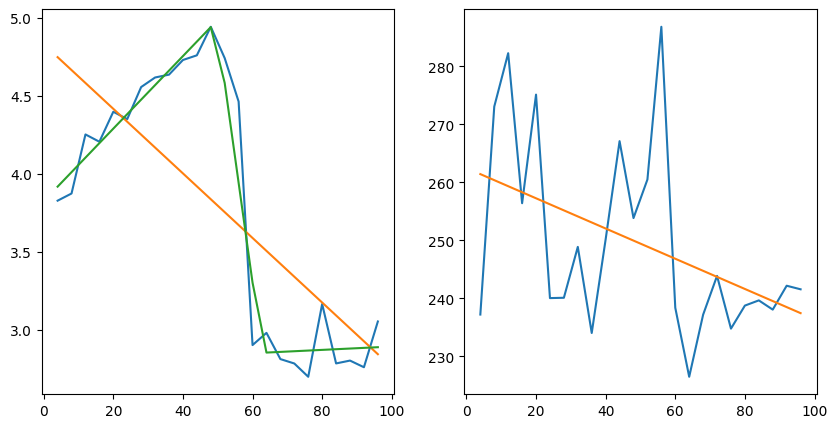

In [110]:
# 512 and 4096
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(filecodes, durations_512, label='512x512')
ax[0].plot(filecodes, y_pred_512, label='Linear Regression')
ax[0].plot(filecodes, y_pred_spline, label='Spline')
ax[1].plot(filecodes, durations_4096, label='4096x4096')
ax[1].plot(filecodes, y_pred_4096, label='Linear Regression')


In [84]:
for i, d in enumerate(durations_512):
    print(i*4, d)

0 3.828116
4 3.874153
8 4.253264
12 4.206351
16 4.398861
20 4.351471
24 4.557403
28 4.618748
32 4.637015
36 4.731012
40 4.761051
44 4.944281
48 4.743085
52 4.464159
56 2.901211
60 2.97965
64 2.811327
68 2.783024
72 2.697758
76 3.16474
80 2.783413
84 2.801726
88 2.759016
92 3.052694


Amdahl's law parameter estimation

In [33]:
p_512 = 2 * (1 - durations_512[1]/durations_512[0]) 
p_4096 = 2 * (1 - durations_4096[1]/durations_4096[0])
# p_512 = (1 - durations_512[1]/durations_512[0]) + (1 - durations_512[2]/durations_512[1])
# p_4096 = (1 - durations_4096[1]/durations_4096[0]) + (1 - durations_4096[2]/durations_4096[1])
print(f'p_512 = {p_512:.2f}')
print(f'p_4096 = {p_4096:.2f}')

p_512 = 1.00
p_4096 = 1.00


In [34]:
# p_4096=1
# p_512=1

In [35]:
# line with slope p
amdal_speedup = lambda p, n: 1/( (1-p) + p/n)
amdal_time = lambda p, n, t_prev: t_prev * ( (1-p) + p/n)

## Amdal time vs Actual time

In [36]:
amdal_time_512 = [amdal_time(p_512, n, durations_512[0]) for n in filecodes]
amdal_time_4096 = [amdal_time(p_4096, n, durations_4096[0]) for n in filecodes]

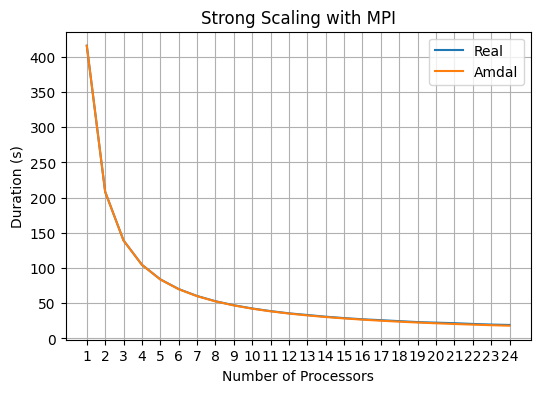

In [141]:
plt.figure(figsize=(6, 4))
plt.plot(filecodes, durations_4096, label='Real')
# plt.scatter(filecodes, durations_4096_new)
plt.plot(filecodes, amdal_time_4096, label='Amdal')
plt.xticks(filecodes)
plt.xlabel('Number of Processors')
plt.ylabel('Duration (s)')
plt.title('Strong Scaling with MPI')
plt.legend()
plt.grid()
plt.show()

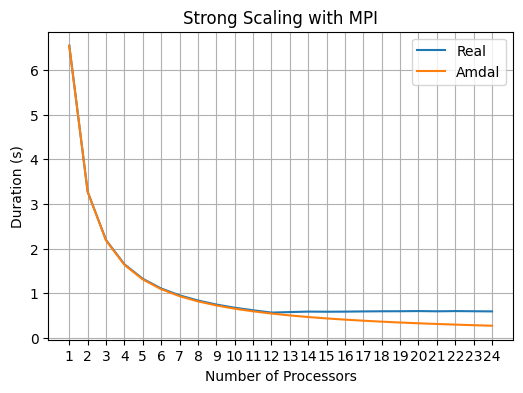

In [166]:
plt.figure(figsize=(6, 4))
plt.plot(filecodes, durations_512, label='Real')
# plt.scatter(filecodes, durations_512)
plt.xticks(filecodes)
plt.plot(filecodes, amdal_time_512, label='Amdal')
plt.xlabel('Number of Processors')
plt.ylabel('Duration (s)')
plt.title('Strong Scaling with MPI')
plt.legend()
plt.grid()
plt.show()

In [40]:
print('real ',durations_4096)
print('amdal ',amdal_time_4096)

real  [415.661696, 208.247553, 139.165655, 104.656798, 83.975518, 70.16855, 60.33325, 52.92974, 47.198111, 42.618235, 38.863273, 35.710124, 36.207067, 36.441758, 36.608824, 36.911322, 37.130758, 37.279484, 37.460135, 37.558358, 37.679134, 37.679653, 37.686583, 37.721004]
amdal  [415.661696, 208.24755299999998, 139.10950533333332, 104.54048149999998, 83.79906719999998, 69.97145766666665, 60.09459371428571, 52.686945749999985, 46.92544177777776, 42.316238599999984, 38.54507236363634, 35.40243383333332, 32.743278153846134, 30.464001857142843, 28.488629066666654, 26.760177874999982, 25.235073882352925, 23.87942588888887, 22.66647768421051, 21.574824299999985, 20.58713790476189, 19.689241181818165, 18.86942243478259, 18.11792191666665]


## Load imbalance